In [1]:
import scipy.integrate as integrate
from math import *
from numpy import sqrt, pi
from sympy import *
init_printing()
from IPython.display import display

In [2]:
# Exercise 1

In [3]:
x = symbols('x')
func = lambda x: (e**x)

In [4]:
def T(n,x):
    if(n == 0):
        return 1
    elif (n == 1):
        return x
    return 2*x *T(n-1,x) - T(n-2,x)

In [5]:
def C(foo,n):
    fun = func
    if n == 0:
        return integrate((1/pi)*fun(x)/(1-x**2)**0.5,(x,-1,1)).evalf(6)
    else:
        return integrate((2/pi)*fun(x)*T(n,x)/(1-x**2)**0.5,(x,-1,1)).evalf(6)

In [6]:
C(func,1)

In [7]:
def Chebyshev(f1,n):
    print('\nn\tCn\n')
    for i in range(n):
        print('%d\t%0.12f\n' %(i, C(f1,i)))
    f = IndexedBase("f")
    i = Idx('i')
    for i in range(n):
        ans = 0
        display(f[i])
        print("=")
        if i == 0:
            ans = ans + C(f1,i)*T(i,x)
            display(ans)
        else:
            for j in range(i+1):
                ans = ans + C(f1,j)*T(j,x)
            display(ans)        
    

In [8]:
def ChebyshevUse(f1,n):
    
    ans = 0
    for j in range(n,-1,-1):
        ans = ans + C(f1,j)*T(j,x)
        
    return ans

In [9]:
ChebyshevUse(func,0)

In [10]:
def Y2(f1,ind,xv):
    expr = ChebyshevUse(f1,ind)
    return expr.subs(x,xv)
Y2(func,0,-1)

In [11]:


# ry25 = []
# ry25.extend([-func(-1)+Y2(func,10,-1),-func(-0.5)+Y2(func,10,-0.5),-func(0)+Y2(func,10,0),-func(0.5)+Y2(func,10,0.5),-func(1)+Y2(func,10,1)])

In [12]:
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt


In [13]:
xx = np.array([-1,-0.5,0,0.5,1]) 
yy = []
yy.extend([func(-1), func(-0.5),func(0),func(0.5), func(1)])
yy = np.array(yy)
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
y2 = []
y2.extend([Y2(func,0,-1),Y2(func,0,-0.5),Y2(func,0,0),Y2(func,0,0.5),Y2(func,0,1)])
y2 = np.array(y2)
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [17]:
y21 = []
y21.extend([Y2(func,1,-1),Y2(func,1,-0.5),Y2(func,1,0),Y2(func,1,0.5),Y2(func,1,1)])
y21 = np.array(y21)

In [19]:
y23 = []
y23.extend([Y2(func,3,-1),Y2(func,3,-0.5),Y2(func,3,0),Y2(func,3,0.5),Y2(func,3,1)])
y23 = np.array(y23)

In [21]:
y25 = []
y25.extend([Y2(func,5,-1),Y2(func,5,-0.5),Y2(func,5,0),Y2(func,5,0.5),Y2(func,5,1)])
y25 = np.array(y25)

In [58]:
y210 = []
y210.extend([Y2(func,10,-1),Y2(func,10,-0.5),Y2(func,10,0),Y2(func,10,0.5),Y2(func,10,1)])
y210 = np.array(y210)

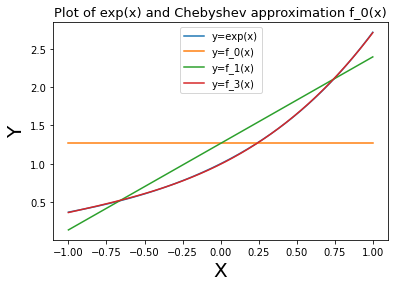

In [20]:
# Dataset
X_Y_Spline = make_interp_spline(xx, yy)
X1_Y1_Spline = make_interp_spline(xx, y2)
X11_Y11_Spline = make_interp_spline(xx, y21)
X13_Y13_Spline = make_interp_spline(xx, y23)
X15_Y15_Spline = make_interp_spline(xx, y25)
# X110_Y110_Spline = make_interp_spline(xx, y210)




# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(xx.min(), xx.max(), 500)
Y_ = X_Y_Spline(X_)

X1_ = np.linspace(xx.min(), xx.max(), 500)
Y1_ = X1_Y1_Spline(X1_)

X11_ = np.linspace(xx.min(), xx.max(), 500)
Y11_ = X11_Y11_Spline(X11_)

X13_ = np.linspace(xx.min(), xx.max(), 500)
Y13_ = X13_Y13_Spline(X13_)

X15_ = np.linspace(xx.min(), xx.max(), 500)
Y15_ = X15_Y15_Spline(X15_)

# X110_ = np.linspace(xx.min(), xx.max(), 500)
# Y110_ = X110_Y110_Spline(X110_)
 
# Plotting the Graph
plt.plot(X_, Y_,label='y=exp(x)')
plt.plot(X1_, Y1_,label='y=f_0(x)')
plt.plot(X11_, Y11_,label='y=f_1(x)')
plt.plot(X13_, Y13_,label='y=f_3(x)')
plt.plot(X15_, Y15_,label='y=f_5(x)')
# plt.plot(X110_, Y110_,label='y=f_10(x)')
plt.title('Plot of exp(x) and Chebyshev approximation f_0(x)',fontsize=13)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
leg = plt.legend(loc='upper center')

plt.show()

In [15]:
# ABSOLUTE ERROR F_0(x)

ry2 = []
ry2.extend([-func(-1)+Y2(func,0,-1),-func(-0.5)+Y2(func,0,-0.5),-func(0)+Y2(func,0,0),-func(0.5)+Y2(func,0,0.5),-func(1)+Y2(func,0,1)])
ry2 = np.array(ry2)

In [41]:
# ERROR FOR F_1(X)
ry21 = []
ry21.extend([-func(-1)+Y2(func,1,-1),-func(-0.5)+Y2(func,1,-0.5),-func(0)+Y2(func,1,0),-func(0.5)+Y2(func,1,0.5),-func(1)+Y2(func,1,1)])
ry21 = np.array(ry21)

In [53]:
#ERROR FOR F_3(x)
ry23 = []
ry23.extend([-func(-1)+Y2(func,3,-1),-func(-0.5)+Y2(func,3,-0.5),-func(0)+Y2(func,3,0),-func(0.5)+Y2(func,3,0.5),-func(1)+Y2(func,3,1)])
ry23 = np.array(ry23)

In [54]:
#ERROR FOR F_5(x)
ry25 = []
ry25.extend([-func(-1)+Y2(func,5,-1),-func(-0.5)+Y2(func,5,-0.5),-func(0)+Y2(func,5,0),-func(0.5)+Y2(func,5,0.5),-func(1)+Y2(func,5,1)])
ry25 = np.array(ry25)

In [ ]:
#ERROR FOR F_10(X)
ry210 = []
ry210.extend([-func(-1)+Y2(func,10,-1),-func(-0.5)+Y2(func,10,-0.5),-func(0)+Y2(func,10,0),-func(0.5)+Y2(func,10,0.5),-func(1)+Y2(func,10,1)])
ry210 = np.array(ry210)

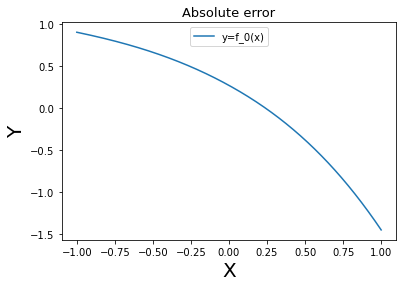

In [16]:
X1_Y1_Spline = make_interp_spline(xx, ry2)
# X11_Y11_Spline = make_interp_spline(xx, ry21)
# X13_Y13_Spline = make_interp_spline(xx, ry23)
# X15_Y15_Spline = make_interp_spline(xx, ry25)
# X110_Y110_Spline = make_interp_spline(xx, ry210)

# Returns evenly spaced numbers
# over a specified interval.

X1_ = np.linspace(xx.min(), xx.max(), 500)
Y1_ = X1_Y1_Spline(X1_)

# X11_ = np.linspace(xx.min(), xx.max(), 500)
# Y11_ = X11_Y11_Spline(X11_)

# X13_ = np.linspace(xx.min(), xx.max(), 500)
# Y13_ = X13_Y13_Spline(X13_)

# X15_ = np.linspace(xx.min(), xx.max(), 500)
# Y15_ = X15_Y15_Spline(X15_)

# X110_ = np.linspace(xx.min(), xx.max(), 500)
# Y110_ = X15_Y15_Spline(X110)
 
# Plotting the Graph
plt.plot(X1_, Y1_,label='y=f_0(x)')
# plt.plot(X11_, Y11_,label='y=f_1(x)')
# plt.plot(X13_, Y13_,label='y=f_3(x)')
# plt.plot(X15_, Y15_,label='y=f_5(x)')
# plt.plot(X11_, Y110_,label='y=f_10(x)')
plt.title('Absolute error',fontsize=13)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
leg = plt.legend(loc='upper center')

plt.show()